In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
swiftgrbs= pd.ExcelFile('SWIFT data.xlsx')
grbs_t = swiftgrbs.parse(1)
grbs_z = swiftgrbs.parse(0)

In [3]:
grbs_t['T90']= grbs_t['T90'].astype(float)
grbs_z['z']= grbs_z['z'].astype(float)

In [4]:
grbs_t['GRB Name']= grbs_t['GRB Name'].str.strip()
grbs_z['GRB Name']= grbs_z['GRB Name'].str.strip()

In [5]:
merged_df = pd.merge(grbs_t, grbs_z, on='GRB Name')

In [6]:
LGRBs_lowz = merged_df.loc[(merged_df['T90'] >= 2) & (merged_df['z'] <= 1)]
SGRBs_lowz = merged_df.loc[(merged_df['T90'] < 2) & (merged_df['z'] <= 1)]

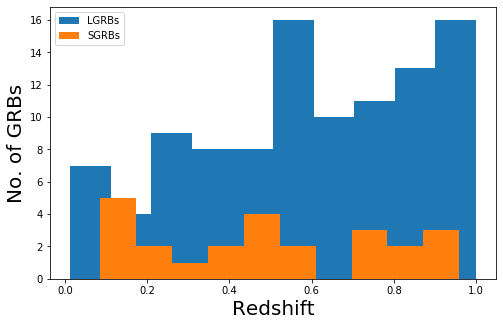

In [23]:
plt.figure(figsize=(8,5)) #sets figure size

plt.hist(LGRBs_lowz.z)
plt.hist(SGRBs_lowz.z)
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('No. of GRBs', fontsize=20)
plt.legend(["LGRBs", "SGRBs"])
plt.show()

In [8]:
LGRBs_highz = merged_df.loc[(merged_df['T90'] >= 2) & (merged_df['z'] > 1)]
SGRBs_highz = merged_df.loc[(merged_df['T90'] < 2) & (merged_df['z'] > 1)]

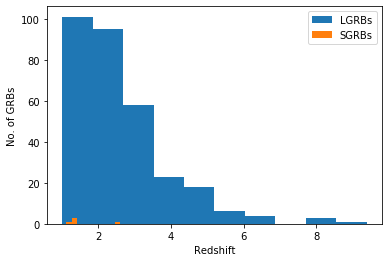

In [9]:
plt.hist(LGRBs_highz.z)
plt.hist(SGRBs_highz.z)
plt.xlabel('Redshift')
plt.ylabel('No. of GRBs')
plt.legend(["LGRBs", "SGRBs"])
plt.show()

In [10]:
#distributions corrected for cosmological time dilation
merged_df['Restframe T90'] = merged_df['T90']/(1 + merged_df['z'])

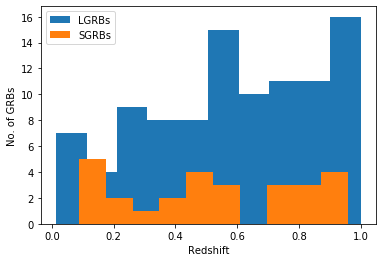

In [11]:
LGRBsrf_lowz = merged_df.loc[(merged_df['Restframe T90'] >= 2) & (merged_df['z'] <= 1)]
SGRBsrf_lowz = merged_df.loc[(merged_df['Restframe T90'] < 2) & (merged_df['z'] <= 1)]
plt.hist(LGRBsrf_lowz.z)
plt.hist(SGRBsrf_lowz.z)
plt.xlabel('Redshift')
plt.ylabel('No. of GRBs')
plt.legend(["LGRBs", "SGRBs"])
plt.show()

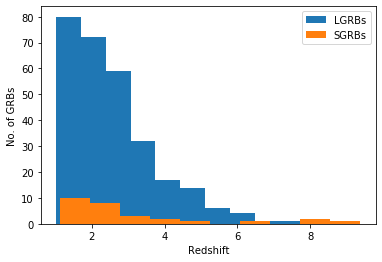

In [12]:
LGRBsrf_highz = merged_df.loc[(merged_df['Restframe T90'] >= 2) & (merged_df['z'] > 1)]
SGRBsrf_highz = merged_df.loc[(merged_df['Restframe T90'] < 2) & (merged_df['z'] > 1)]
plt.hist(LGRBsrf_highz.z)
plt.hist(SGRBsrf_highz.z)
plt.xlabel('Redshift')
plt.ylabel('No. of GRBs')
plt.legend(["LGRBs", "SGRBs"])
plt.show()

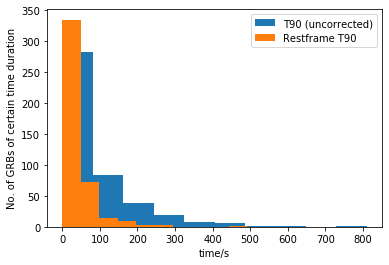

In [13]:
plt.hist(merged_df['T90'])
plt.hist(merged_df['Restframe T90'])
plt.xlabel('time/s')
plt.ylabel('No. of GRBs of certain time duration')
plt.legend(['T90 (uncorrected)', 'Restframe T90'])
plt.show()

In [14]:
merged_df.to_csv('swift_data.csv', sep='\t', index=False)

In [17]:
LGRBs = merged_df.loc[(merged_df['T90'] >= 2)]
SGRBs = merged_df.loc[(merged_df['T90'] < 2)]

len(LGRBs)

411